# Analisis Pasar Mobil Bekas di Arab Saudi

## Pendahuluan

Notebook ini akan menganalisis dataset pasar mobil bekas di Arab Saudi. Kita akan mengeksplorasi berbagai faktor yang mempengaruhi harga mobil bekas dan mengembangkan model prediktif untuk memperkirakan harga berdasarkan karakteristik mobil.

## Daftar Isi

1. Pemahaman Masalah Bisnis
2. Pemahaman Data
3. Pra-pemrosesan Data
4. Pemodelan
5. Kesimpulan
6. Rekomendasi

## Impor Library

Mari kita mulai dengan mengimpor library yang diperlukan:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Pemahaman Masalah Bisnis

### Konteks

Pasar mobil bekas di Arab Saudi memiliki potensi pertumbuhan yang signifikan. Beberapa faktor pendorong utama meliputi:
- Peningkatan pendapatan masyarakat
- Bertambahnya jumlah pengemudi wanita
- Berkembangnya platform jual-beli online seperti Syarah.com

Proyeksi pertumbuhan pasar mobil bekas di Arab Saudi:
- Nilai transaksi (GTV) diperkirakan meningkat 4,5% per tahun dari 2019-2025
- Volume penjualan diproyeksikan tumbuh 2% per tahun

Pandemi COVID-19 berdampak pada:
- Meningkatnya stok mobil bekas
- Menurunnya pendapatan masyarakat
- Kenaikan PPN dari 5% menjadi 15% pada 2020

Hal ini mendorong konsumen untuk lebih mempertimbangkan membeli mobil bekas. Pasar mobil bekas Arab Saudi diperkirakan mencapai $8,69 miliar pada 2027, dengan CAGR 7,36% dari 2021-2027.

### Pernyataan Masalah

Tantangan utama adalah menentukan harga yang tepat untuk mobil bekas. Harga yang terlalu tinggi dapat menghambat penjualan, sementara harga terlalu rendah mengurangi keuntungan. Banyak faktor mempengaruhi harga seperti merek, model, tahun, jarak tempuh, dan spesifikasi lainnya.

### Tujuan

Mengembangkan model prediksi harga mobil bekas berdasarkan spesifikasinya. Model ini akan menjadi acuan bagi penjual dan pembeli dalam menentukan harga, serta membantu platform seperti Syarah.com meningkatkan transaksi dan pertumbuhan bisnis.

### Pendekatan Analitis

Membangun model regresi untuk memprediksi harga mobil bekas berdasarkan fitur-fitur yang relevan dari data historis penjualan.

### Metrik Evaluasi

Metrik utama yang akan digunakan:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)
- R-squared (untuk model linear)

Semakin rendah nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi harga. R-squared yang mendekati 1 menunjukkan model yang lebih baik dalam menjelaskan variasi data.

## Pemahaman Data

Pada bagian ini, kita akan melakukan eksplorasi dan analisis awal terhadap dataset mobil bekas Arab Saudi. Tujuannya adalah untuk memahami karakteristik data, distribusi variabel, dan hubungan antar variabel.

### Melihat Informasi Dasar Dataset

Pertama, mari kita lihat informasi dasar dari dataset:

In [2]:
df = pd.read_csv('../data/data_saudi_used_cars.csv')

print(df.info())

print(df.describe())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB
None
              Year  Engine_Size       Mileage          Price
count  5624.000000  5624.000000  5.624000e+03    5624.000000
mean   2014.101885     3.295430  1.509234e+05   53074.058144
std       5.791606     1.515108  3.828360e+05   70155.340614
min    1963.000000     1.

### Analisis Variabel Kategorik

Selanjutnya, kita akan menganalisis variabel kategorik dalam dataset:

Type: 347 nilai unik
Type
Land Cruiser    269
Camry           234
Hilux           207
Accent          174
Yukon           162
Name: count, dtype: int64


Region: 27 nilai unik
Region
Riyadh       2272
Dammam        925
Jeddah        733
Qassim        225
Al-Medina     214
Name: count, dtype: int64


Make: 58 nilai unik
Make
Toyota       1431
Hyundai       670
Ford          530
Chevrolet     458
Nissan        387
Name: count, dtype: int64


Gear_Type: 2 nilai unik
Gear_Type
Automatic    4875
Manual        749
Name: count, dtype: int64


Origin: 4 nilai unik
Origin
Saudi          4188
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64


Options: 3 nilai unik
Options
Full         2233
Standard     1822
Semi Full    1569
Name: count, dtype: int64




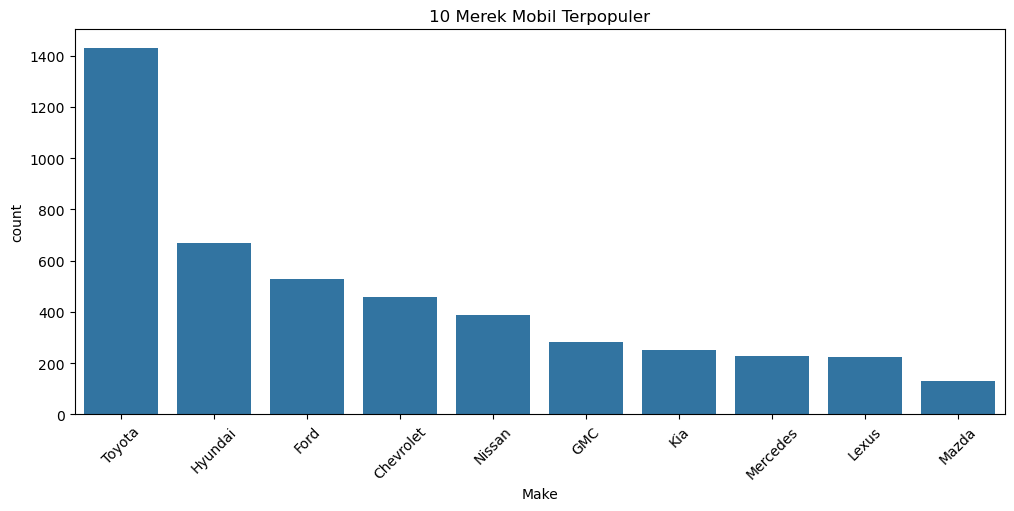

In [3]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].nunique()} nilai unik")
  print(df[col].value_counts().head())
  print("\n")

plt.figure(figsize=(12, 5))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().index[:10])
plt.title('10 Merek Mobil Terpopuler')
plt.xticks(rotation=45)
plt.show()

### Analisis Variabel Numerik

Kita juga perlu menganalisis variabel numerik dalam dataset:

              Year  Engine_Size       Mileage          Price
count  5624.000000  5624.000000  5.624000e+03    5624.000000
mean   2014.101885     3.295430  1.509234e+05   53074.058144
std       5.791606     1.515108  3.828360e+05   70155.340614
min    1963.000000     1.000000  1.000000e+02       0.000000
25%    2012.000000     2.000000  3.800000e+04       0.000000
50%    2016.000000     3.000000  1.030000e+05   36500.000000
75%    2018.000000     4.500000  1.960000e+05   72932.500000
max    2022.000000     9.000000  2.000000e+07  850000.000000


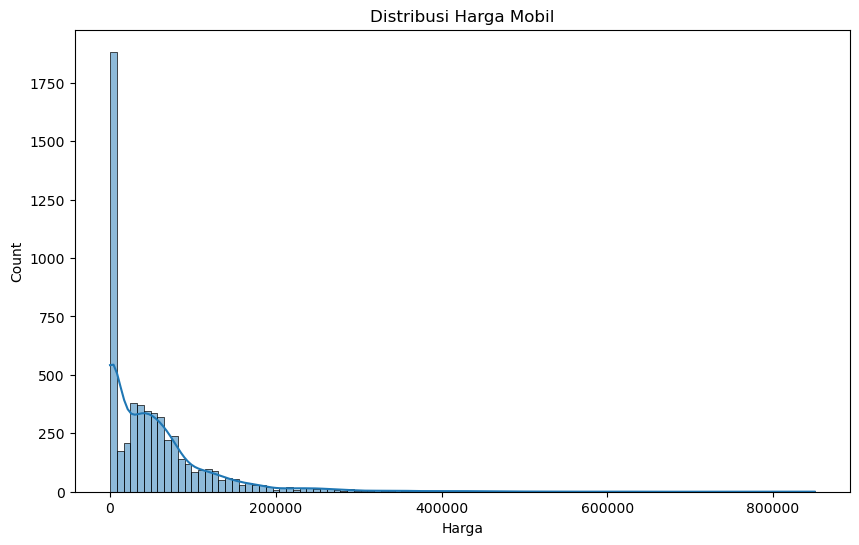

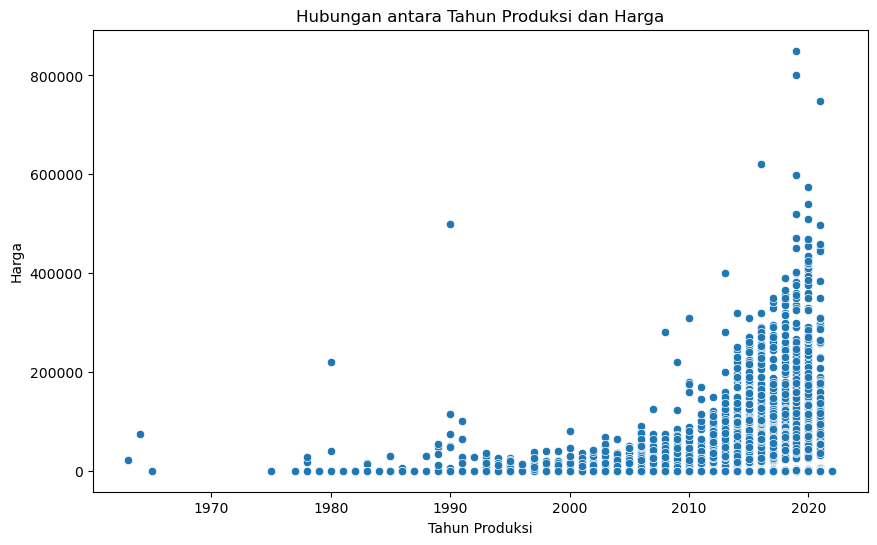

In [4]:
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Hubungan antara Tahun Produksi dan Harga')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga')
plt.show()

### Analisis Korelasi

Terakhir, kita akan melihat korelasi antar variabel numerik:

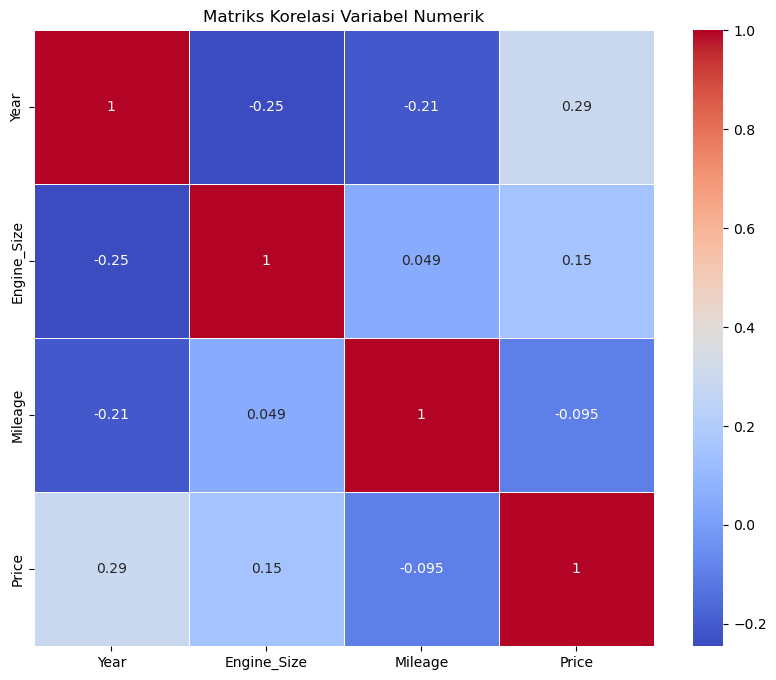

In [5]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

Dengan melakukan analisis ini, kita dapat memperoleh pemahaman yang lebih baik tentang karakteristik dataset mobil bekas Arab Saudi. Informasi ini akan sangat berguna dalam tahap preprocessing data dan pemilihan fitur untuk model prediksi harga mobil bekas.

## Pra-pemrosesan Data

Pada tahap ini, kita akan mempersiapkan data untuk pemodelan dengan melakukan beberapa langkah pra-pemrosesan. Tujuannya adalah untuk membersihkan data, menangani nilai yang hilang, dan mengubah variabel kategorik menjadi bentuk numerik.

### Penanganan Nilai Hilang

Pertama, mari kita periksa apakah ada nilai yang hilang dalam dataset kita:

In [6]:
print(df.isnull().sum())

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64


### Penanganan Outlier

Selanjutnya, kita akan memeriksa dan menangani outlier pada variabel numerik:

Jumlah outlier pada kolom Price: 261


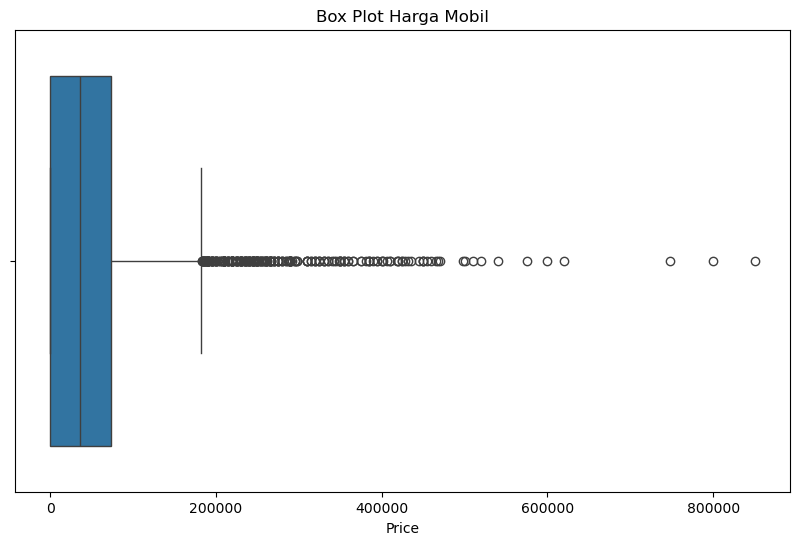

In [7]:
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = detect_outliers(df, 'Price')
print(f"Jumlah outlier pada kolom Price: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot Harga Mobil')
plt.show()

### Encoding Variabel Kategorik

Kita perlu mengubah variabel kategorik menjadi bentuk numerik agar dapat digunakan dalam model:

In [8]:
df_encoded = pd.get_dummies(df, columns=['Make', 'Type', 'Region', 'Gear_Type', 'Origin', 'Options'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Options_encoded'] = le.fit_transform(df['Options'])

### Normalisasi Fitur Numerik

Terakhir, kita akan melakukan normalisasi pada fitur numerik:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Year', 'Engine_Size', 'Mileage']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Pemisahan Data

Setelah pra-pemrosesan selesai, kita akan memisahkan data menjadi set pelatihan dan pengujian:

In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran set pelatihan:", X_train.shape)
print("Ukuran set pengujian:", X_test.shape)

Ukuran set pelatihan: (4499, 445)
Ukuran set pengujian: (1125, 445)


Dengan melakukan langkah-langkah pra-pemrosesan ini, data kita sekarang siap untuk digunakan dalam pemodelan. Pra-pemrosesan yang tepat sangat penting untuk memastikan kualitas dan keandalan model yang akan kita buat.

## Pemodelan

Kita akan menggunakan beberapa algoritma yang umum digunakan untuk masalah regresi, yaitu Linear Regression, Random Forest, dan Gradient Boosting. Kemudian, kita akan membandingkan performa masing-masing model.

### 1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print(f"RMSE: {lr_rmse}")
print(f"R2 Score: {lr_r2}")

Linear Regression Results:
RMSE: 49239.393361183334
R2 Score: 0.5253386855988911


### 2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Results:")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


Random Forest Results:
RMSE: 30803.531203755912
R2 Score: 0.8142368954020556


### 3. Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)

print("\nGradient Boosting Results:")
print(f"RMSE: {gb_rmse}")
print(f"R2 Score: {gb_r2}")


Gradient Boosting Results:
RMSE: 34069.29843040234
R2 Score: 0.77275997358912


### Perbandingan Model

Untuk membandingkan performa ketiga model, kita bisa membuat tabel perbandingan:

In [14]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_scores = [lr_rmse, rf_rmse, gb_rmse]
r2_scores = [lr_r2, rf_r2, gb_r2]

comparison_df = pd.DataFrame({
  'Model': models,
  'RMSE': rmse_scores,
  'R2 Score': r2_scores
})

print("\nPerbandingan Model:")
print(comparison_df)


Perbandingan Model:
               Model          RMSE  R2 Score
0  Linear Regression  49239.393361  0.525339
1      Random Forest  30803.531204  0.814237
2  Gradient Boosting  34069.298430  0.772760


### Visualisasi Perbandingan Model

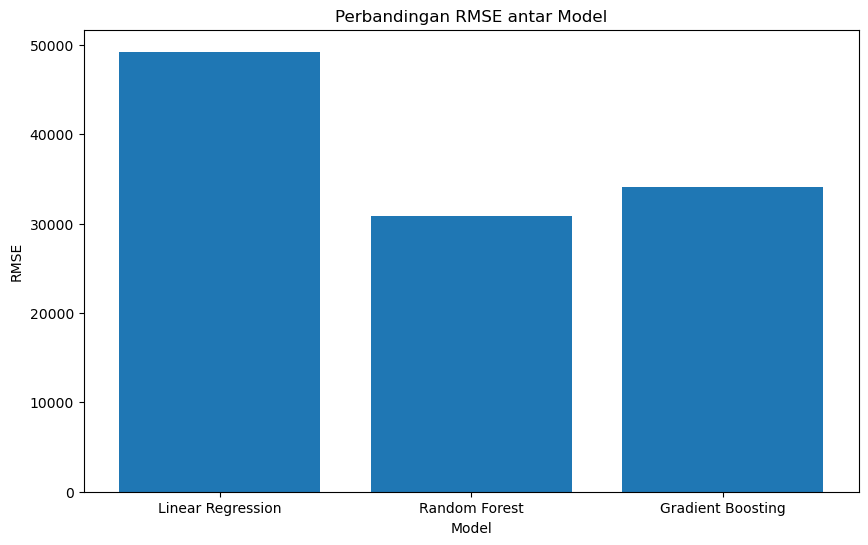

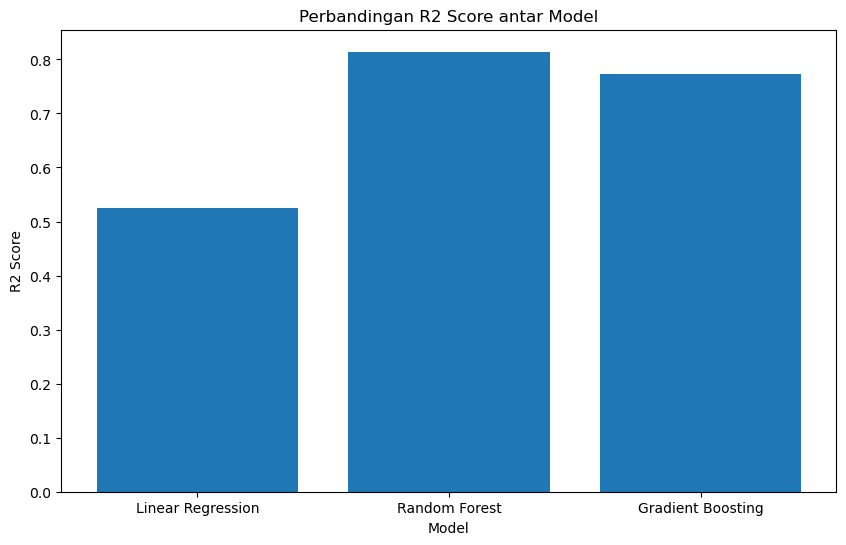

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.title('Perbandingan RMSE antar Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('Perbandingan R2 Score antar Model')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

Dengan melakukan pemodelan dan evaluasi ini, kita dapat melihat performa masing-masing model dalam memprediksi harga mobil bekas. Model dengan RMSE terendah dan R2 Score tertinggi umumnya dianggap sebagai model terbaik.

## Interpretasi Hasil dan Rekomendasi

### Interpretasi Hasil

Berdasarkan hasil visualisasi perbandingan ketiga model, dapat disimpulkan:

1. Perbandingan RMSE

- Linear Regression memiliki RMSE tertinggi (sekitar 50.000), menunjukkan tingkat kesalahan prediksi yang besar
- Random Forest menunjukkan performa terbaik dengan RMSE terendah (sekitar 30.000)
- Gradient Boosting memiliki RMSE sedikit lebih tinggi dari Random Forest (sekitar 33.000)

2. Perbandingan R² Score

- Linear Regression mencapai R² Score sekitar 0.52, artinya hanya dapat menjelaskan 52% variasi dalam data
- Random Forest memiliki R² Score terbaik sekitar 0.81 (81%)
- Gradient Boosting menunjukkan R² Score sekitar 0.77 (77%)

### Rekomendasi

1. Pemilihan Model

- Random Forest sebaiknya dipilih sebagai model utama karena menunjukkan performa terbaik dalam kedua metrik
- Model Linear Regression sebaiknya dihindari karena performanya yang kurang memuaskan
- Gradient Boosting bisa dijadikan alternatif karena performanya yang cukup baik

2. Pengembangan Model

- Fokus pada optimasi parameter Random Forest untuk meningkatkan performa
- Pertimbangkan untuk mengkombinasikan Random Forest dan Gradient Boosting dalam ensemble model
- Lakukan validasi silang untuk memastikan konsistensi performa model

3. Implementasi Praktis

- Gunakan Random Forest untuk sistem prediksi harga otomatis
- Sertakan interval kepercayaan dalam prediksi untuk memberikan range harga yang realistis
- Pertimbangkan trade-off antara akurasi dan kecepatan komputasi dalam implementasi

4. Monitoring dan Evaluasi

- Evaluasi performa model secara berkala
- Perbarui model dengan data terbaru untuk mempertahankan akurasi
- Pantau stabilitas prediksi model dalam berbagai kondisi pasar

5. Pengembangan Lanjutan

- Identifikasi fitur-fitur yang paling berpengaruh dalam model Random Forest
- Kumpulkan data tambahan yang mungkin dapat meningkatkan akurasi prediksi
- Pertimbangkan untuk mengembangkan model khusus untuk segmen pasar tertentu